Другий рівень (ускладнений)

In [53]:
import pandas as pd
import numpy as np
from IPython.display import display, Markdown
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr
from sklearn.preprocessing import OneHotEncoder
from tabulate import tabulate
from timeit import timeit

In [54]:
pd_df = pd.read_csv("healthcare-dataset-stroke-data.csv")
pd_df.fillna(pd_df.mean(numeric_only=True).astype(int), inplace=True)
pd_df['age'] = pd_df['age'].astype('int64')

display(pd_df.head(20))
# pd_df['date'] = pd.to_datetime(pd_df['date'], format="%m/%d/%Y")
# pd_df['wip'] = pd_df['wip'].astype('int64')


id  gender  age  hypertension  heart_disease ever_married  \
0    9046    Male   67             0              1          Yes   
1   51676  Female   61             0              0          Yes   
2   31112    Male   80             0              1          Yes   
3   60182  Female   49             0              0          Yes   
4    1665  Female   79             1              0          Yes   
5   56669    Male   81             0              0          Yes   
6   53882    Male   74             1              1          Yes   
7   10434  Female   69             0              0           No   
8   27419  Female   59             0              0          Yes   
9   60491  Female   78             0              0          Yes   
10  12109  Female   81             1              0          Yes   
11  12095  Female   61             0              1          Yes   
12  12175  Female   54             0              0          Yes   
13   8213    Male   78             0              1          Yes   
14   5317  Female   79             0              1          Yes   
15  58202  Female   50             1              0          Yes   
16  56112    Male   64             0              1          Yes   
17  34120    Male   75             1              0          Yes   
18  27458  Female   60             0              0           No   
19  25226    Male   57             0              1           No   

        work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0         Private          Urban             228.69  36.6  formerly smoked   
1   Self-employed          Rural             202.21  28.0     never smoked   
2         Private          Rural             105.92  32.5     never smoked   
3         Private          Urban             171.23  34.4           smokes   
4   Self-employed          Rural             174.12  24.0     never smoked   
5         Private          Urban             186.21  29.0  formerly smoked   
6         Private          Rural              70.09  27.4     never smoked   
7         Private          Urban              94.39  22.8     never smoked   
8         Private          Rural              76.15  28.0          Unknown   
9         Private          Urban              58.57  24.2          Unknown   
10        Private          Rural              80.43  29.7     never smoked   
11       Govt_job          Rural             120.46  36.8           smokes   
12        Private          Urban             104.51  27.3           smokes   
13        Private          Urban             219.84  28.0          Unknown   
14        Private          Urban             214.09  28.2     never smoked   
15  Self-employed          Rural             167.41  30.9     never smoked   
16        Private          Urban             191.61  37.5           smokes   
17        Private          Urban             221.29  25.8           smokes   
18        Private          Urban              89.22  37.8     never smoked   
19       Govt_job          Urban             217.08  28.0          Unknown   

    stroke  
0        1  
1        1  
2        1  
3        1  
4        1  
5        1  
6        1  
7        1  
8        1  
9        1  
10       1  
11       1  
12       1  
13       1  
14       1  
15       1  
16       1  
17       1  
18       1  
19       1

In [55]:
# num_headers: list = ["smv"]
num_headers: list = ["avg_glucose_level", "bmi"]
def normalize_data(df: pd.DataFrame | np.ndarray, columns: list) -> pd.DataFrame | np.ndarray:
    if isinstance(df, pd.DataFrame):
        for column in columns:
            df[column] = (df[column]-df[column].min())/(df[column].max()-df[column].min())
        return df
    elif isinstance(df, np.ndarray):
        for col in columns:
            df[col] = (df[col] - np.min(df[col])) / (np.max(df[col]) - np.min(df[col]))
        return df
    
def standartize_data(df: pd.DataFrame | np.ndarray, columns: list) -> pd.DataFrame | np.ndarray:
    if isinstance(df, pd.DataFrame):
        for column in columns:
            df[column] = (df[column]-df[column].mean())/df[column].std()
        return df
    elif isinstance(df, np.ndarray):
        for col in columns:
            df[col] = (df[col]-np.mean(df[col]))/np.std(df[col])
        return df

In [79]:
pd_normalize_copy = pd_df.copy(deep=True)
print(f"Execution time: {timeit(lambda: normalize_data(pd_normalize_copy, num_headers), number=1)}")

normalized_df = normalize_data(pd_normalize_copy, num_headers)

Execution time: 0.0015913000097498298


In [80]:
pd_standartize_copy = pd_df.copy(deep=True)
print(f"Execution time: {timeit(lambda: standartize_data(pd_standartize_copy, num_headers), number=1)}")
standartized_df = standartize_data(pd_standartize_copy, num_headers)

Execution time: 0.0032273000106215477


In [81]:
def draw_normalized(df: pd.DataFrame | np.ndarray, normalized_df: pd.DataFrame | np.ndarray) -> None:
    sns.set_style("darkgrid")
    fig: plt.Figure
    ax: tuple[plt.Axes, plt.Axes]
    
    fig, ax  = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))
    if isinstance(df, pd.DataFrame) & isinstance(normalized_df, pd.DataFrame):
        sns.lineplot(data=df.iloc[1000:2000], x='avg_glucose_level', y='bmi', ax=ax[0], color='red')
        sns.lineplot(data=normalized_df.iloc[1000:2000], x='avg_glucose_level', y='bmi', ax=ax[1])
    else:
        sns.lineplot(x=df['avg_glucose_level'][1000:2000], y=df['bmi'][1000:2000], ax=ax[0], color='red')
        sns.lineplot(x=normalized_df['avg_glucose_level'][1000:2000], 
                     y=normalized_df['bmi'][1000:2000], ax=ax[1])
    
    ax[0].set_title("Initial dataframe")
    ax[1].set_title("Normalized dataframe")

    ax[0].grid(True)
    ax[1].grid(True)
    plt.tight_layout()
    plt.show()

In [82]:
def draw_standartized(df: pd.DataFrame | np.ndarray, standartized_df: pd.DataFrame | np.ndarray)-> None:
    sns.set_style("darkgrid")
    fig: plt.Figure
    ax: tuple[plt.Axes, plt.Axes]

    fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))
    if isinstance(df, pd.DataFrame) & isinstance(standartized_df, pd.DataFrame):
        sns.lineplot(data=df.iloc[1000:2000], x='avg_glucose_level', y='bmi', ax=ax[0], color='red')
        sns.lineplot(data=standartized_df.iloc[1000:2000], x='avg_glucose_level', y='bmi', ax=ax[1])
    else:
        sns.lineplot(x=df['avg_glucose_level'][1000:2000], y=df['bmi'][1000:2000], ax=ax[0], color='red')
        sns.lineplot(x=standartized_df['avg_glucose_level'][1000:2000], 
                     y=standartized_df['bmi'][1000:2000], ax=ax[1])
    ax[0].set_title("Initial dataframe")
    ax[1].set_title("Standartized dataframe")

    ax[0].grid(True)
    ax[1].grid(True)
    plt.tight_layout()
    plt.show()

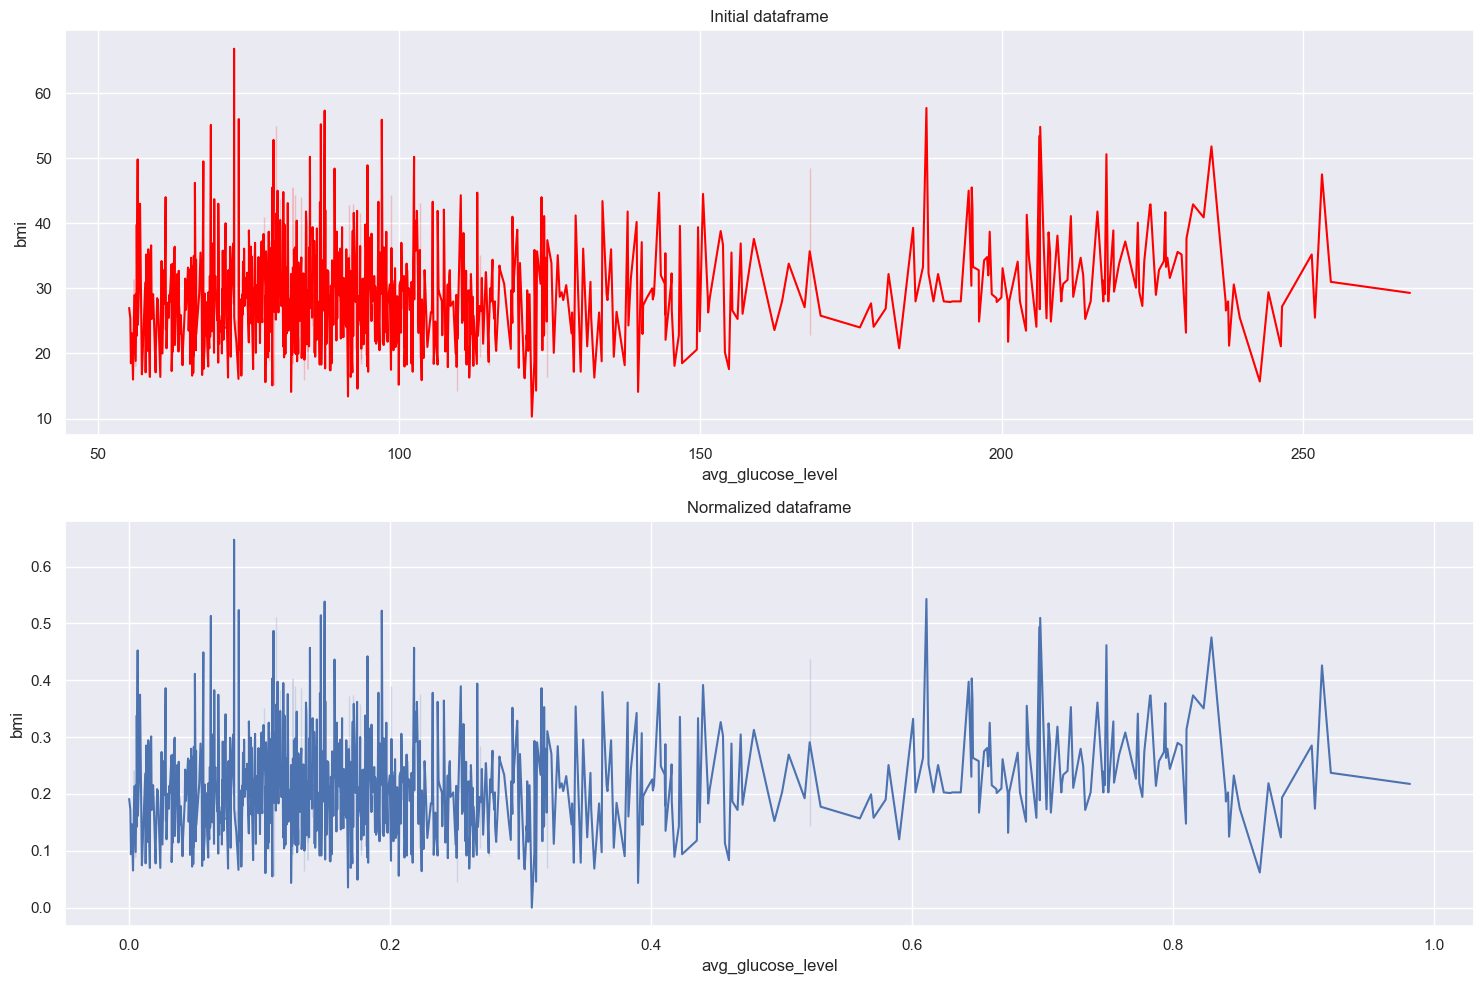

Execution time: 4.204789099982008


In [60]:
print(f"Execution time: {timeit(lambda: draw_normalized(pd_df, normalized_df), number=1)}")

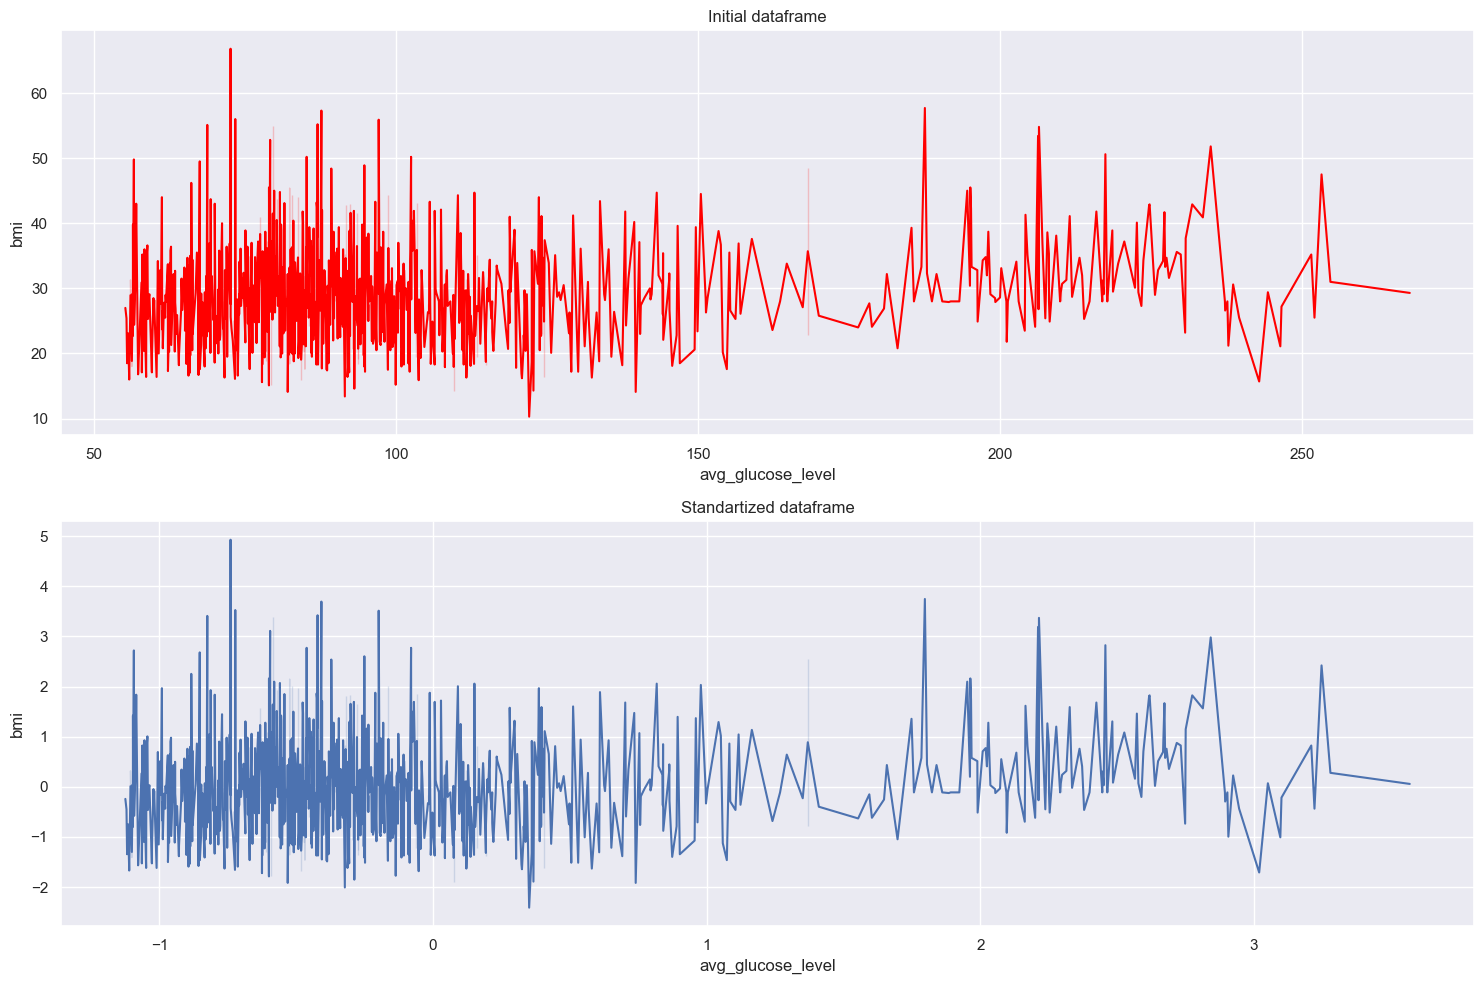

Execution time: 3.974674800003413


In [83]:
print(f"Execution time: {timeit(lambda: draw_standartized(pd_df, standartized_df), number=1)}")

In [84]:
def draw_histplot(df: pd.DataFrame | np.ndarray) -> None:
    plt.figure(figsize=(10, 6))
    sns.set_theme(style="whitegrid")
    palette = {
    'formerly smoked': "#FF6347",
    'never smoked': "#1E90FF",
    'smokes': "#32CD32",
    'Unknown': "#fff33b"
}   
    if isinstance(df, pd.DataFrame):
        sns.histplot(data=df, x='avg_glucose_level', 
             bins=10,
             palette=palette, alpha=0.8, kde=True, multiple='stack', binwidth=3,
            linewidth=1, hue='smoking_status', edgecolor='violet')
    else:
        sns.histplot(x=df['avg_glucose_level'], 
             bins=10,
             palette=palette, alpha=0.8, kde=True, multiple='stack', binwidth=3,
            linewidth=1, hue=df['smoking_status'], edgecolor='violet')
    plt.title("Histogram: average glucose level")
    plt.xlabel("avg_glucose_level")
    plt.ylabel("Number of entries")
    plt.grid(True)
    plt.show()

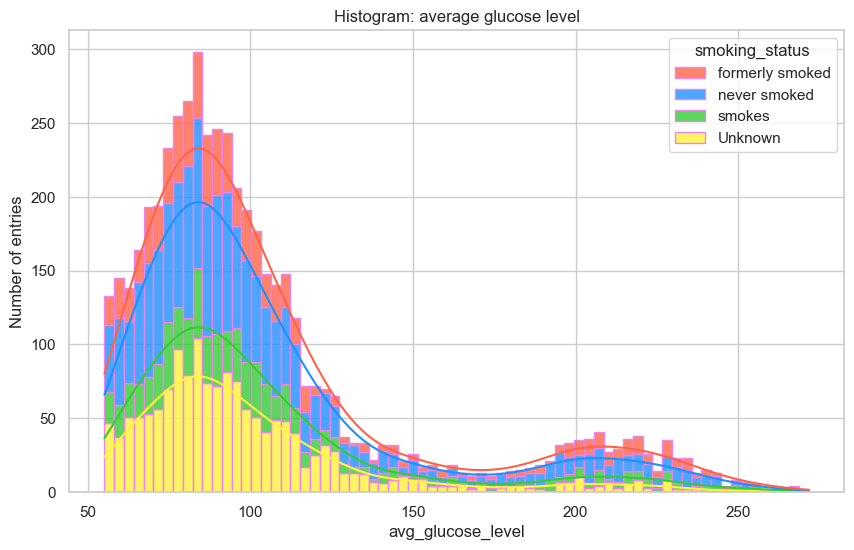

Execution time: 0.8697050999908242


In [85]:
print(f"Execution time: {timeit(lambda: draw_histplot(pd_df), number=1)}")

Pearson and Spearman coefficients

In [86]:
def calculate_coeff(x: pd.DataFrame | np.ndarray, y: pd.DataFrame | np.ndarray) -> None:
    pearson_corr, pearson_pval = pearsonr(x, y)
    spearman_corr, spearman_pval = spearmanr(x, y)
    print(f"Pearson coefficient: {pearson_corr:.4f}, p-value: {pearson_pval:.4g}")
    print(f"Spearmen coefficient: {spearman_corr:.4f}, p-value: {spearman_pval:.4g}")


In [87]:
print(f"Execution time: {timeit(lambda: calculate_coeff(pd_df["bmi"], pd_df["avg_glucose_level"]), number=1)}")

Pearson coefficient: 0.1666, p-value: 3.877e-33
Spearmen coefficient: 0.1116, p-value: 1.272e-15
Execution time: 0.008133099996484816


One-Hot encoding

In [88]:
def one_hot_encode(df: pd.DataFrame | np.ndarray, categorical_headers: list, encoder: OneHotEncoder) -> pd.DataFrame | np.ndarray:
    if isinstance(df, pd.DataFrame):
        categorical_df = df[categorical_headers]
        encoded_array = encoder.fit_transform(categorical_df).toarray()
        encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(categorical_headers))
        general_df = pd.concat([df.drop(columns=categorical_headers).reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)
    else:
        temp_list = list(df.dtype.names)
        for el in temp_list:
            if el in categorical_headers:
                temp_list.remove(el)

        temp_df = df[temp_list]

        categorical_indices = [df.dtype.names.index(header) for header in categorical_headers]
        if df.ndim == 1:
            df = np.array([list(tup) for tup in df])
        
        categorical_data = df[:, categorical_indices]
        
        encoded_array = encoder.fit_transform(categorical_data)
        encoded_headers = list(encoder.get_feature_names_out(categorical_headers))
        
        encoded_df = np.core.records.fromarrays(encoded_array.T, names=encoded_headers)
        encoded_df = encoded_df.view(np.ndarray)
        


        all_fields = list(temp_df.dtype.names) + list(encoded_df.dtype.names)
        all_data = [temp_df[name] for name in temp_df.dtype.names] + \
                    [encoded_df[name] for name in encoded_df.dtype.names]
        
        general_df = np.rec.fromarrays(all_data, names=all_fields)
    return general_df

In [89]:
categorical_headers: list = ["gender", "smoking_status", "ever_married", "work_type", "Residence_type"]
encoder = OneHotEncoder(handle_unknown='ignore')

print(f"Execution time: {timeit(lambda: one_hot_encode(pd_df, categorical_headers, encoder), number=1)}")

encoded_pd_df = one_hot_encode(pd_df, categorical_headers, encoder)
display(encoded_pd_df.head(20))

Execution time: 0.02059289999306202


id  age  hypertension  heart_disease  avg_glucose_level   bmi  stroke  \
0    9046   67             0              1             228.69  36.6       1   
1   51676   61             0              0             202.21  28.0       1   
2   31112   80             0              1             105.92  32.5       1   
3   60182   49             0              0             171.23  34.4       1   
4    1665   79             1              0             174.12  24.0       1   
5   56669   81             0              0             186.21  29.0       1   
6   53882   74             1              1              70.09  27.4       1   
7   10434   69             0              0              94.39  22.8       1   
8   27419   59             0              0              76.15  28.0       1   
9   60491   78             0              0              58.57  24.2       1   
10  12109   81             1              0              80.43  29.7       1   
11  12095   61             0              1             120.46  36.8       1   
12  12175   54             0              0             104.51  27.3       1   
13   8213   78             0              1             219.84  28.0       1   
14   5317   79             0              1             214.09  28.2       1   
15  58202   50             1              0             167.41  30.9       1   
16  56112   64             0              1             191.61  37.5       1   
17  34120   75             1              0             221.29  25.8       1   
18  27458   60             0              0              89.22  37.8       1   
19  25226   57             0              1             217.08  28.0       1   

    gender_Female  gender_Male  gender_Other  ...  smoking_status_smokes  \
0             0.0          1.0           0.0  ...                    0.0   
1             1.0          0.0           0.0  ...                    0.0   
2             0.0          1.0           0.0  ...                    0.0   
3             1.0          0.0           0.0  ...                    1.0   
4             1.0          0.0           0.0  ...                    0.0   
5             0.0          1.0           0.0  ...                    0.0   
6             0.0          1.0           0.0  ...                    0.0   
7             1.0          0.0           0.0  ...                    0.0   
8             1.0          0.0           0.0  ...                    0.0   
9             1.0          0.0           0.0  ...                    0.0   
10            1.0          0.0           0.0  ...                    0.0   
11            1.0          0.0           0.0  ...                    1.0   
12            1.0          0.0           0.0  ...                    1.0   
13            0.0          1.0           0.0  ...                    0.0   
14            1.0          0.0           0.0  ...                    0.0   
15            1.0          0.0           0.0  ...                    0.0   
16            0.0          1.0           0.0  ...                    1.0   
17            0.0          1.0           0.0  ...                    1.0   
18            1.0          0.0           0.0  ...                    0.0   
19            0.0          1.0           0.0  ...                    0.0   

    ever_married_No  ever_married_Yes  work_type_Govt_job  \
0               0.0               1.0                 0.0   
1               0.0               1.0                 0.0   
2               0.0               1.0                 0.0   
3               0.0               1.0                 0.0   
4               0.0               1.0                 0.0   
5               0.0               1.0                 0.0   
6               0.0               1.0                 0.0   
7               1.0               0.0                 0.0   
8               0.0               1.0                 0.0   
9               0.0               1.0                 0.0   
10              0.0               1.0                 0.0 

In [90]:
def draw_heatmap(df: pd.DataFrame) -> None:
    plt.figure(figsize=(20, 15))
    sns.heatmap(df.corr(), annot=True, cmap='Blues', fmt='.2f', linewidths=0.7)
    plt.title('Correlational matrix')
    plt.show()

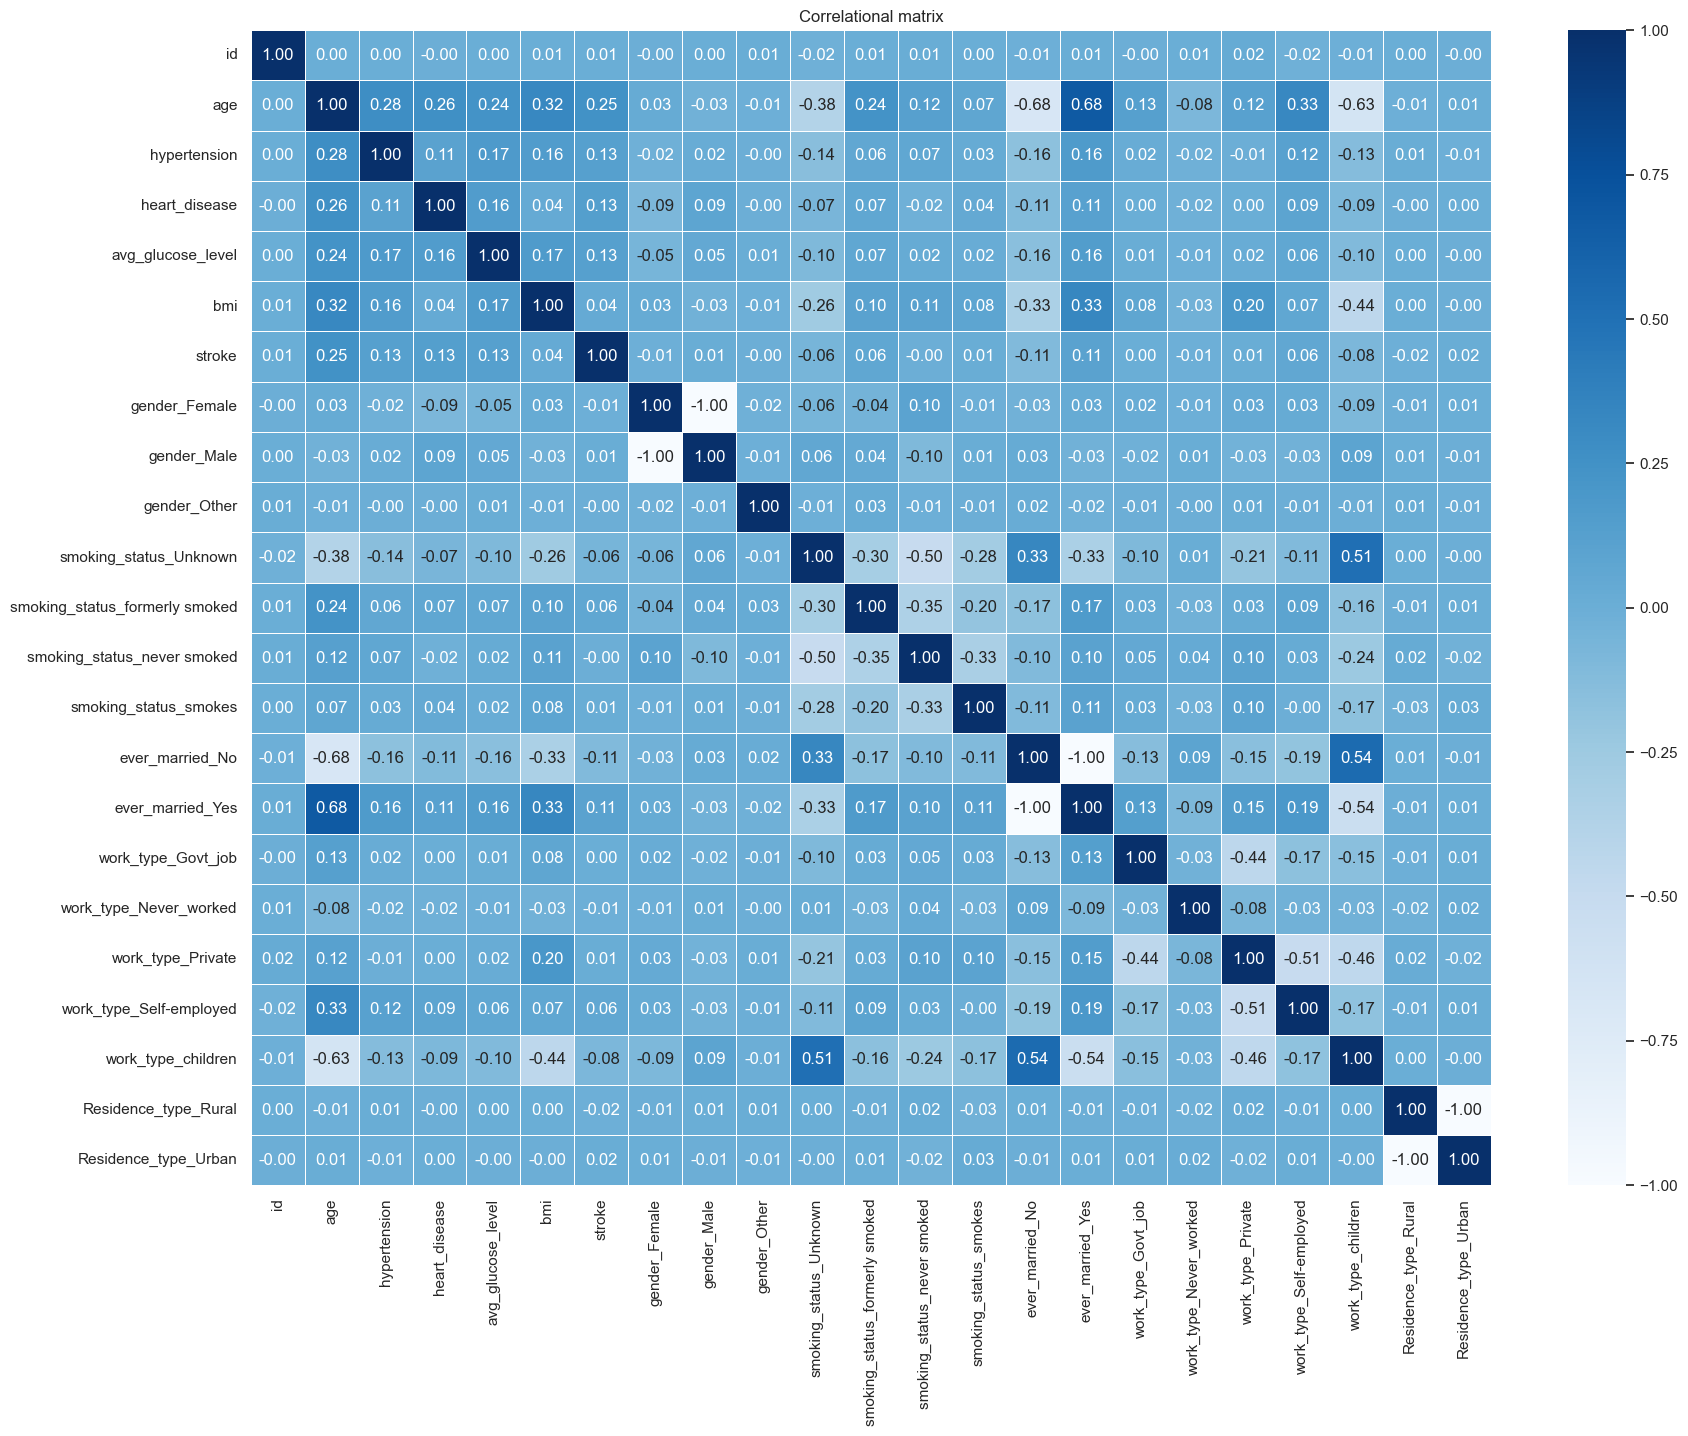

Execution time: 1.6645060000009835


In [91]:
print(f"Execution time: {timeit(lambda: draw_heatmap(encoded_pd_df), number=1)}")

In [92]:
def draw_pairplot(df: pd.DataFrame | np.ndarray) -> None:
    numeric_df = df[["avg_glucose_level", "bmi"]]
    if isinstance(df, pd.DataFrame):
        g = sns.pairplot(numeric_df, height=3, aspect=1.8,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde")
    else:
        new_df = pd.DataFrame(numeric_df)
        g = sns.pairplot(data=new_df, height=3, aspect=1.8,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde")
    
    g.axes.flatten()[0].set_xticks(np.arange(0, 300, 50))
    g.axes.flatten()[0].set_yticks(np.arange(0, 250, 50))
    g.axes.flatten()[1].set_xticks(np.arange(0, 100, 10))
    for ax in g.axes.flatten():
        ax.grid(True)
    plt.suptitle("Pairplot of Numerical Features", y=1.02)
    plt.show()

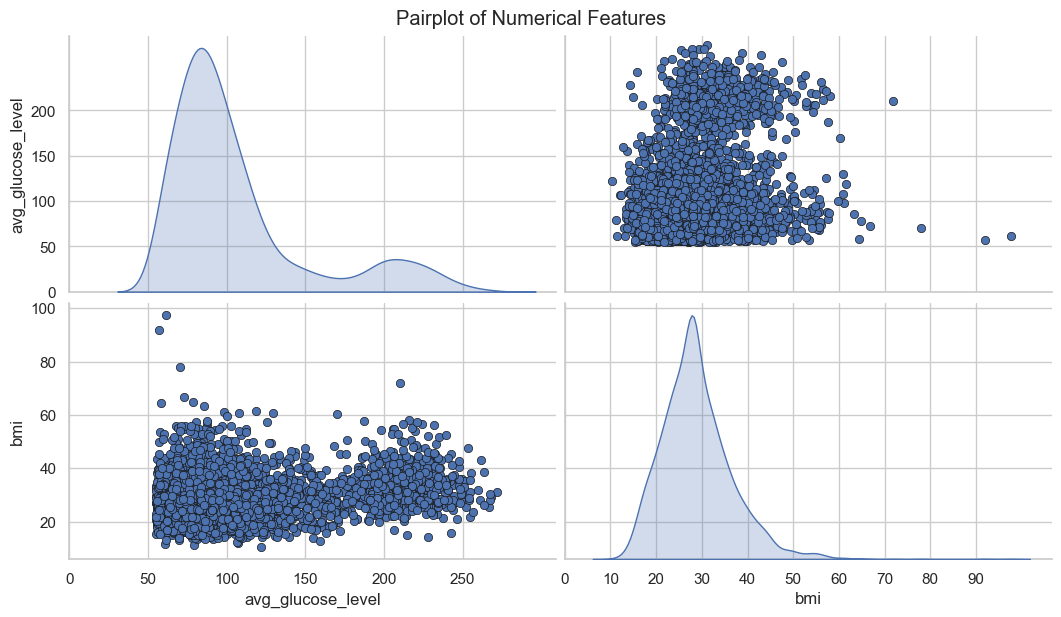

Execution time: 2.1693243000190705


In [71]:
print(f"Execution time: {timeit(lambda: draw_pairplot(pd_df), number=1)}")

Numpy implementation

In [93]:
np_types: list[tuple] = [("id", "int64"), ("gender", "U6"), ("age",
              "int64"), ("hypertension", "int64"), ("heart_disease",
              "int64"), ("ever_married", "U3"), ("work_type",
              "U14"), ("Residence_type", "U5"), ("avg_glucose_level",
              "float64"), ("bmi","float64"), ("smoking_status",
              "U16"), ("stroke", "int64")]

np_df = np.genfromtxt("healthcare-dataset-stroke-data.csv", missing_values=["N/A", np.nan],
                      delimiter=",", dtype=np_types, encoding='utf-8', names=True)

numeric_columns = [header for header in np_df.dtype.names if np_df[header].dtype in ['float64', 'int64']]
means = {col: round(np.nanmean(np_df[col]), 1) for col in numeric_columns}

for col in numeric_columns:
    np_df[col] = np.nan_to_num(np_df[col], nan=means[col])
    
print(tabulate(np_df, headers=np_df.dtype.names, tablefmt='rounded_grid'))

╭───────┬──────────┬───────┬────────────────┬─────────────────┬────────────────┬───────────────┬──────────────────┬─────────────────────┬───────┬──────────────────┬──────────╮
│    id │ gender   │   age │   hypertension │   heart_disease │ ever_married   │ work_type     │ Residence_type   │   avg_glucose_level │   bmi │ smoking_status   │   stroke │
├───────┼──────────┼───────┼────────────────┼─────────────────┼────────────────┼───────────────┼──────────────────┼─────────────────────┼───────┼──────────────────┼──────────┤
│  9046 │ Male     │    67 │              0 │               1 │ Yes            │ Private       │ Urban            │              228.69 │  36.6 │ formerly smoked  │        1 │
├───────┼──────────┼───────┼────────────────┼─────────────────┼────────────────┼───────────────┼──────────────────┼─────────────────────┼───────┼──────────────────┼──────────┤
│ 51676 │ Female   │    61 │              0 │               0 │ Yes            │ Self-employed │ Rural            │     

╭───────┬──────────┬───────┬────────────────┬─────────────────┬────────────────┬───────────────┬──────────────────┬─────────────────────┬───────────┬──────────────────┬──────────╮
│    id │ gender   │   age │   hypertension │   heart_disease │ ever_married   │ work_type     │ Residence_type   │   avg_glucose_level │       bmi │ smoking_status   │   stroke │
├───────┼──────────┼───────┼────────────────┼─────────────────┼────────────────┼───────────────┼──────────────────┼─────────────────────┼───────────┼──────────────────┼──────────┤
│  9046 │ Male     │    67 │              0 │               1 │ Yes            │ Private       │ Urban            │         0.801265    │ 0.30126   │ formerly smoked  │        1 │
├───────┼──────────┼───────┼────────────────┼─────────────────┼────────────────┼───────────────┼──────────────────┼─────────────────────┼───────────┼──────────────────┼──────────┤
│ 51676 │ Female   │    61 │              0 │               0 │ Yes            │ Self-employed │ Rur

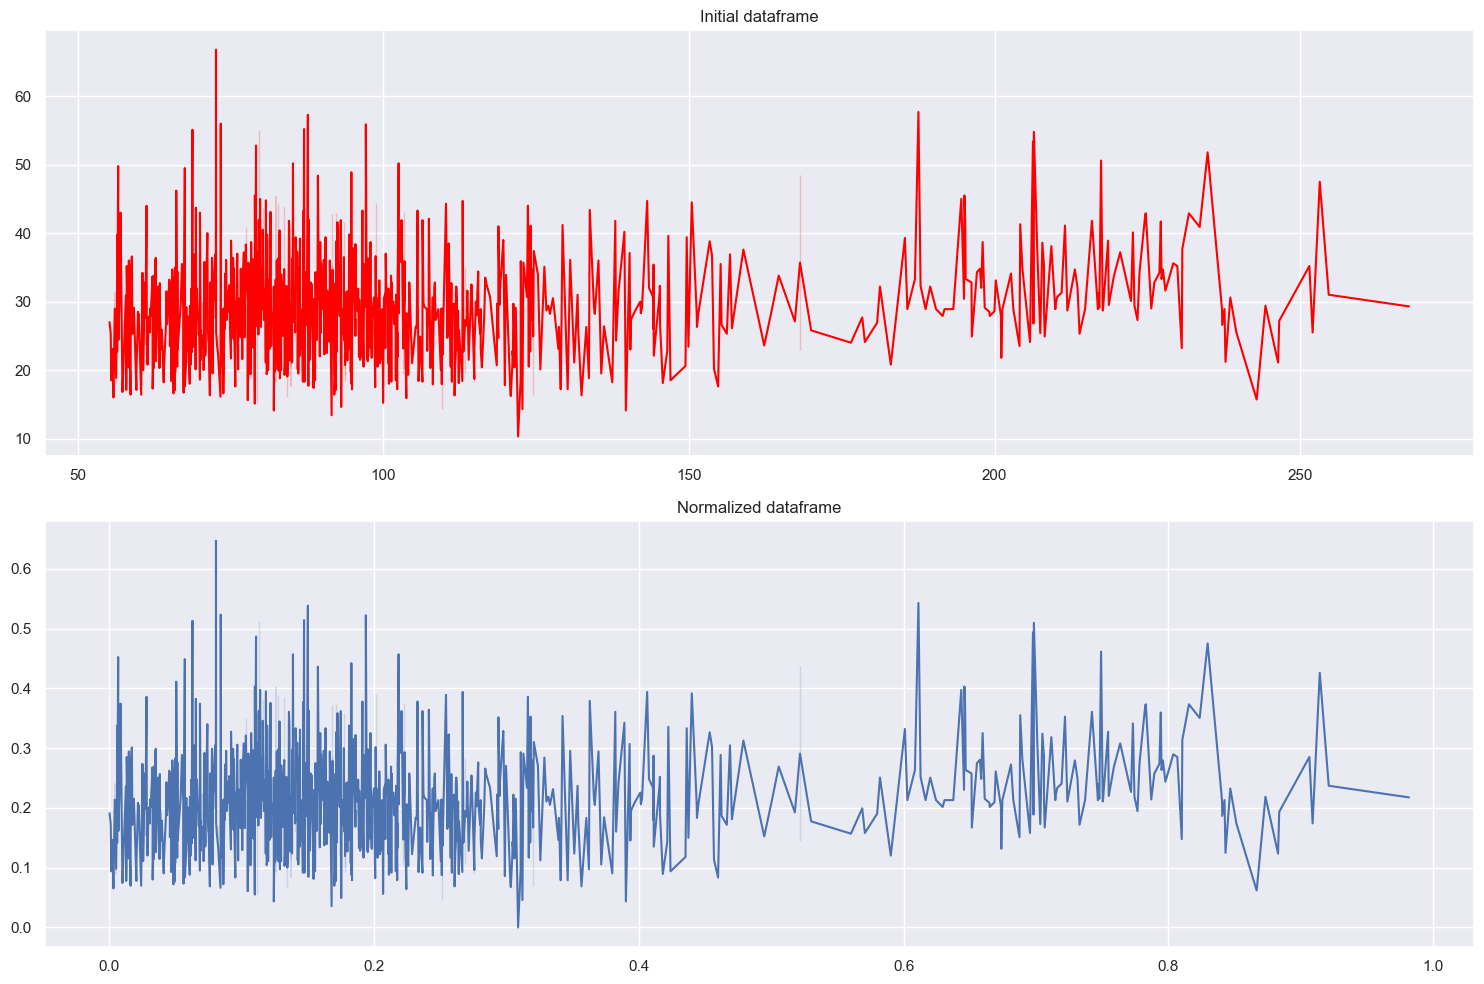

Execution time: 5.288457600021502


In [94]:
print(tabulate(normalized_np_df := normalize_data(np_df.copy(), num_headers),
                headers=normalized_np_df.dtype.names, tablefmt='rounded_grid'))

print(f"Execution time: {timeit(lambda: draw_normalized(np_df, normalized_np_df), number=1)}")

╭───────┬──────────┬───────┬────────────────┬─────────────────┬────────────────┬───────────────┬──────────────────┬─────────────────────┬──────────────┬──────────────────┬──────────╮
│    id │ gender   │   age │   hypertension │   heart_disease │ ever_married   │ work_type     │ Residence_type   │   avg_glucose_level │          bmi │ smoking_status   │   stroke │
├───────┼──────────┼───────┼────────────────┼─────────────────┼────────────────┼───────────────┼──────────────────┼─────────────────────┼──────────────┼──────────────────┼──────────┤
│  9046 │ Male     │    67 │              0 │               1 │ Yes            │ Private       │ Urban            │         2.70638     │  1.0012      │ formerly smoked  │        1 │
├───────┼──────────┼───────┼────────────────┼─────────────────┼────────────────┼───────────────┼──────────────────┼─────────────────────┼──────────────┼──────────────────┼──────────┤
│ 51676 │ Female   │    61 │              0 │               0 │ Yes            │ Self

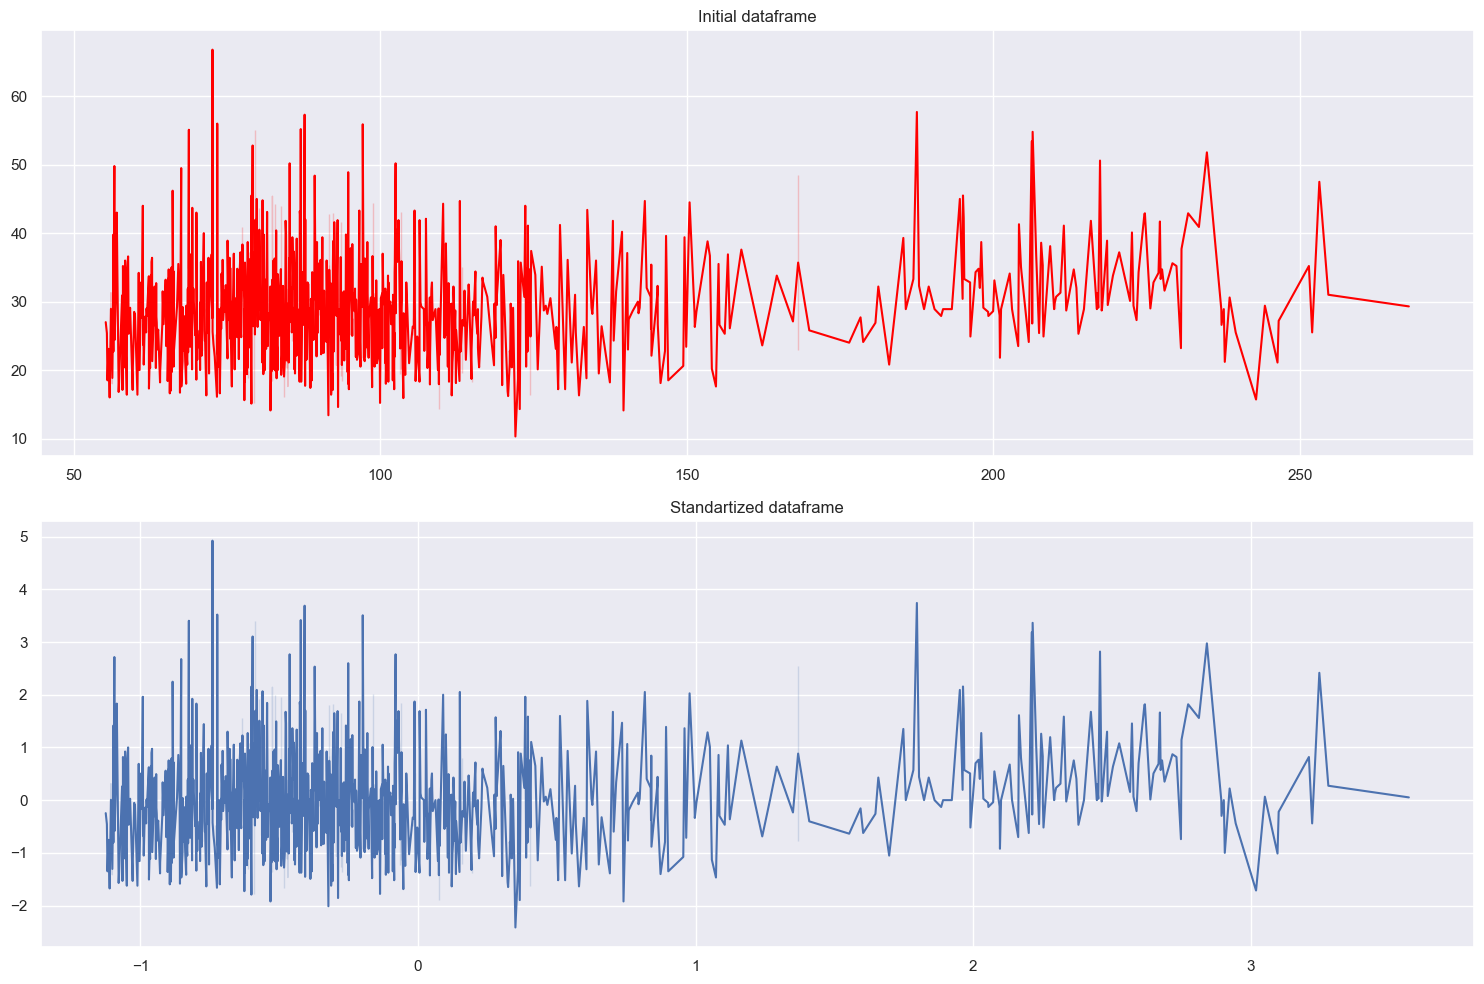

Execution time: 5.147761900007026


In [95]:
print(tabulate(standartized_np_df := standartize_data(np_df.copy(), num_headers),
                headers=standartized_np_df.dtype.names, tablefmt='rounded_grid'))

print(f"Execution time: {timeit(lambda: draw_standartized(np_df, standartized_np_df), number=1)}")

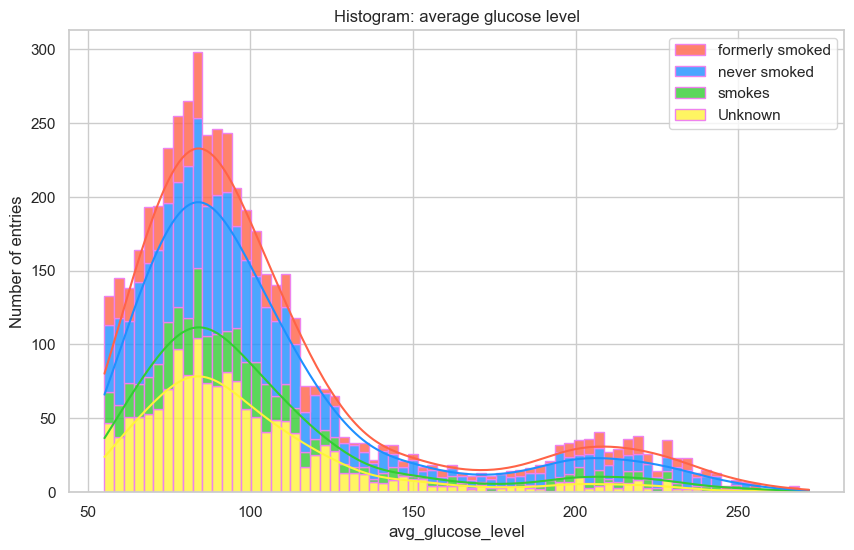

Execution time: 0.9660229000146501


In [96]:
print(f"Execution time: {timeit(lambda: draw_histplot(np_df), number=1)}")

In [97]:
print(f"Execution time: {timeit(lambda: calculate_coeff(np_df["bmi"], np_df["avg_glucose_level"]), number=1)}")

Pearson coefficient: 0.1688, p-value: 5.845e-34
Spearmen coefficient: 0.1139, p-value: 3.112e-16
Execution time: 0.008548399986466393


In [98]:
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
print(f"Execution time: {timeit(lambda: one_hot_encode(np_df, categorical_headers, encoder), number=1)}")
encoded_np_df = one_hot_encode(np_df, categorical_headers, encoder)
print(tabulate(encoded_np_df[:20], encoded_np_df.dtype.names, tablefmt="rounded_grid"))

Execution time: 0.2633671000075992
╭───────┬───────┬────────────────┬─────────────────┬───────────────┬─────────────────────┬───────┬──────────┬─────────────────┬───────────────┬────────────────┬──────────────────────────┬──────────────────────────────────┬───────────────────────────────┬─────────────────────────┬───────────────────┬────────────────────┬──────────────────────┬──────────────────────────┬─────────────────────┬───────────────────────────┬──────────────────────┬────────────────────────┬────────────────────────╮
│    id │   age │   hypertension │   heart_disease │ work_type     │   avg_glucose_level │   bmi │   stroke │   gender_Female │   gender_Male │   gender_Other │   smoking_status_Unknown │   smoking_status_formerly smoked │   smoking_status_never smoked │   smoking_status_smokes │   ever_married_No │   ever_married_Yes │   work_type_Govt_job │   work_type_Never_worked │   work_type_Private │   work_type_Self-employed │   work_type_children │   Residence_type_Rural │ 

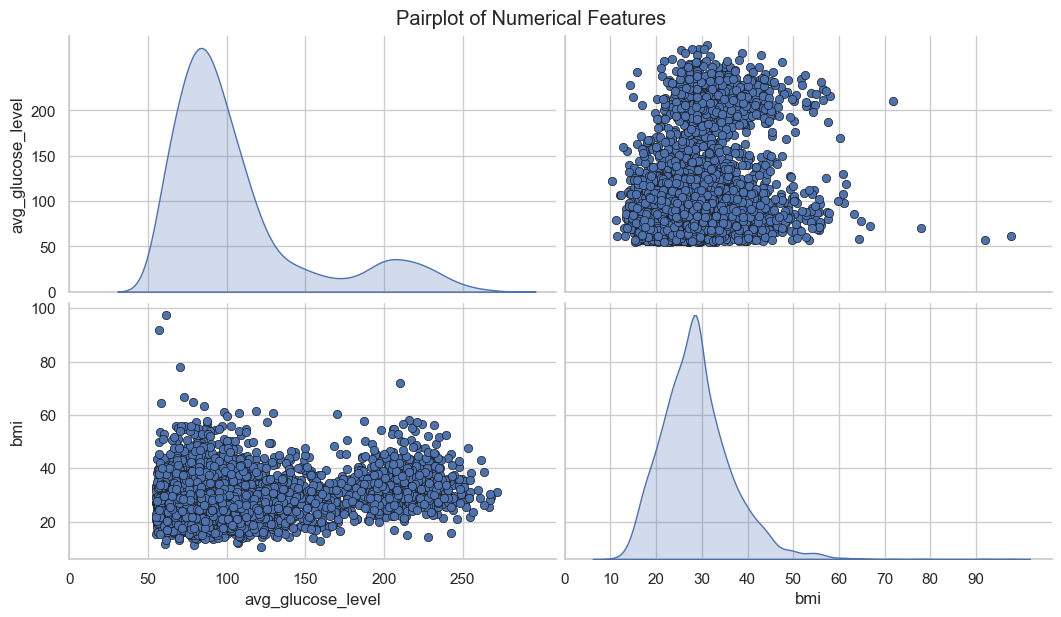

Execution time: 1.5720707000000402


In [99]:
print(f"Execution time: {timeit(lambda: draw_pairplot(np_df), number=1)}")